In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime


In [2]:
handles = ["@Apple", "@Visa", "@amazon", "@Walmart",'@netflix','@Nike','@Macys']
dataframes = {}

In [3]:
for handle in handles:
    print(f"data/sentiments_{handle}.csv")
    df = pd.read_csv(f"data/sentiments_{handle}.csv")
    df = df.drop("Unnamed: 0",axis=1)
    df = df.reset_index()
    df = df.rename(columns={"index":"id"})
    print(df.columns)
    
    df = df.drop(df[df['compound'] == "compound"].index)
    df = df.dropna(how='any') 
    
    df["compound"] = pd.to_numeric(df["compound"] )
    df["neg"] = pd.to_numeric(df["neg"] )
    df["neu"] = pd.to_numeric(df["neu"] )
    df["pos"] = pd.to_numeric(df["pos"] )
    df["date"] = [datetime.strptime(x,"%a %b %d %H:%M:%S %z %Y").date() for x in df["tweet_date"]]
    
    df = df[["compound","date"]]
    date_group = df.groupby(["date"])
    compound_date = pd.DataFrame(date_group.mean())
    compound_date = compound_date.reset_index()
    
    print(compound_date)
    
    dataframes.update({handle:compound_date})
    

data/sentiments_@Apple.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'tweet_date',
       'tweet_id'],
      dtype='object')
          date  compound
0   2017-10-31 -0.023406
1   2017-11-01  0.042015
2   2017-11-02 -0.024569
3   2017-11-03  0.002326
4   2017-11-04  0.006751
5   2017-11-05 -0.036146
6   2017-11-06 -0.018984
7   2017-11-07 -0.026920
8   2017-11-08 -0.079056
9   2017-11-09 -0.016207
10  2017-11-10  0.022330
11  2017-11-11 -0.003702
12  2017-11-12 -0.042564
13  2017-11-13  0.023584
14  2017-11-14  0.007057
15  2017-11-15 -0.000817
16  2017-11-16 -0.003810
17  2017-11-17  0.022791
18  2017-11-18  0.033605
19  2017-11-19 -0.008634
20  2017-11-20  0.047840
21  2017-11-21 -0.031952
22  2017-11-22  0.051742
23  2017-11-23 -0.012408
24  2017-11-24  0.043177
25  2017-11-25  0.139413
26  2017-11-26  0.103054
27  2017-11-27  0.045169
28  2017-11-28  0.075654
29  2017-11-29 -0.026276
data/sentiments_@Visa.csv
Index(['id', 'compound', 'entity', 'neg', 'neu', 'pos', 'twe

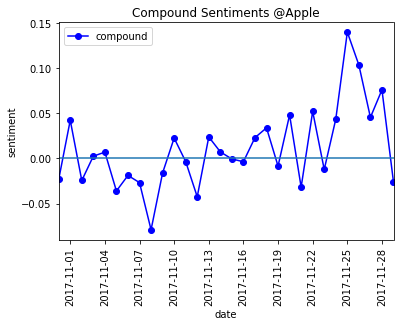

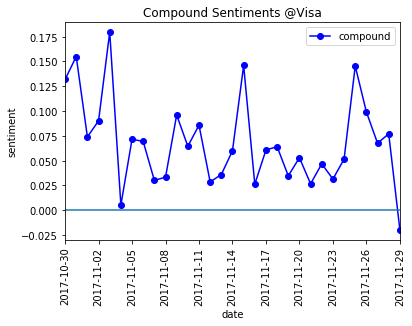

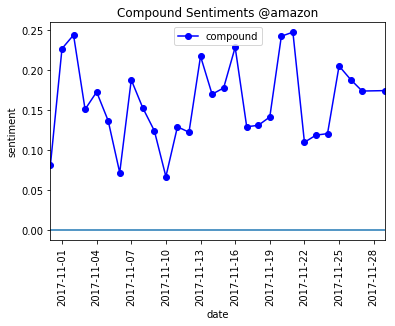

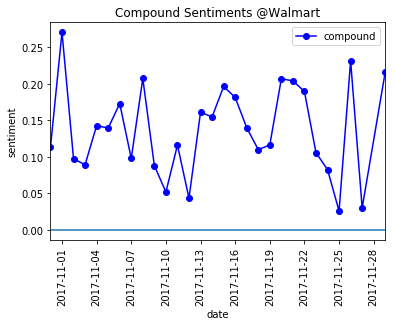

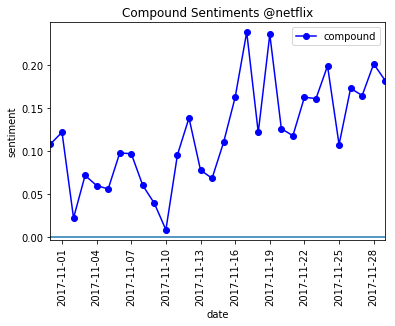

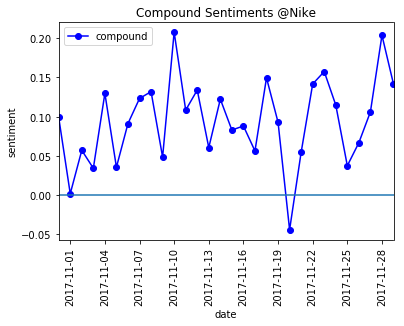

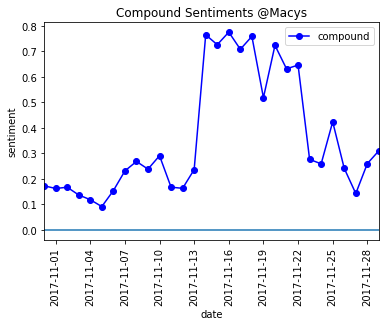

In [4]:
for key, df in dataframes.items():
    df.plot(kind="line",x="date",y="compound",color="blue",label="compound",marker="o")
    plt.axhline(0.00)
    plt.xlabel("date")
    plt.ylabel("sentiment")
    plt.title(f"Compound Sentiments {key}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f"figures/Compound_Sentiments_{key}.png")
#     plt.ylim(-0.2,0.2)
    
    plt.show()

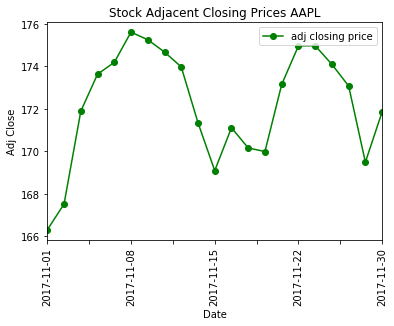

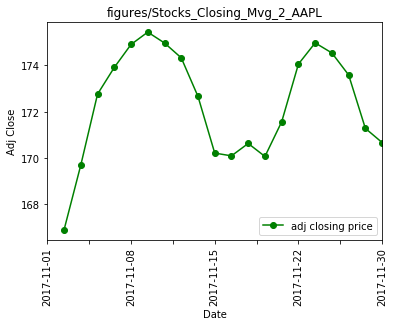

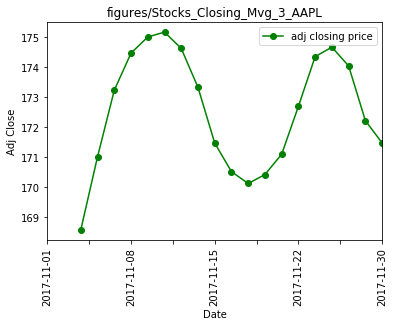

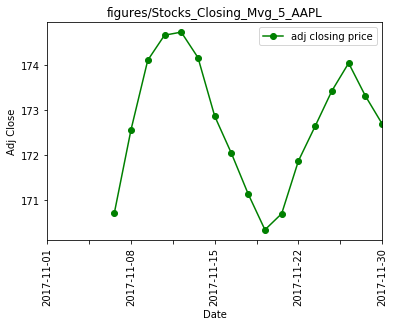

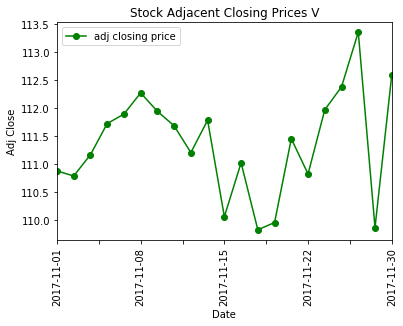

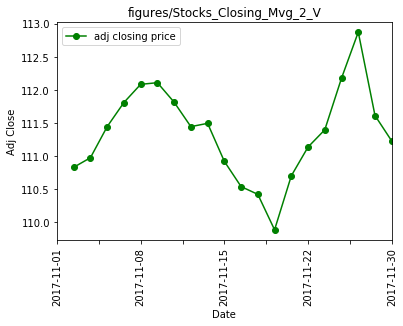

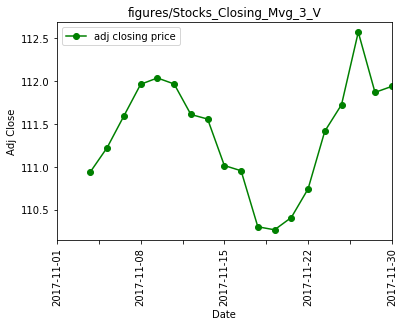

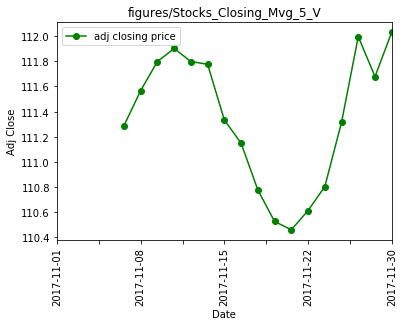

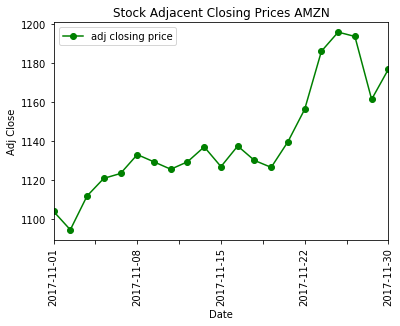

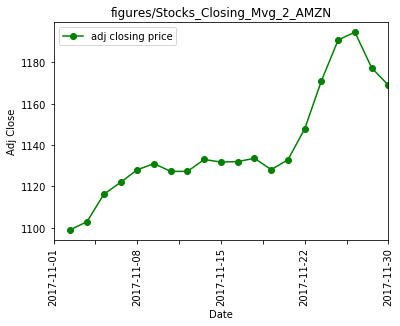

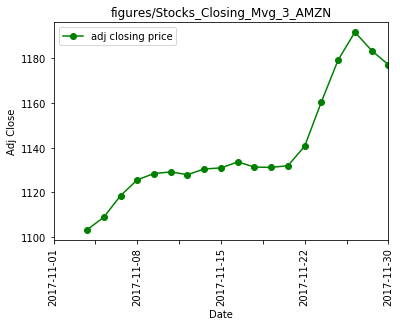

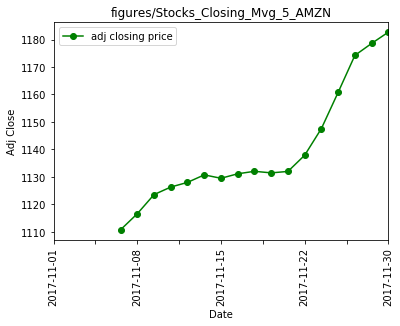

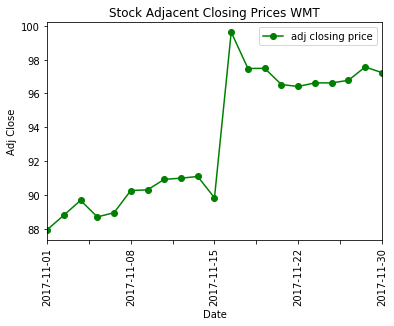

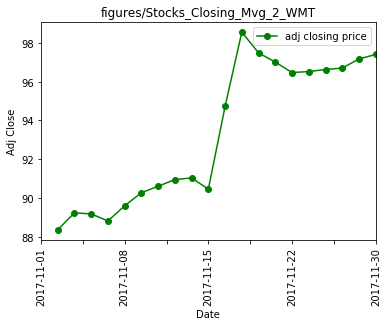

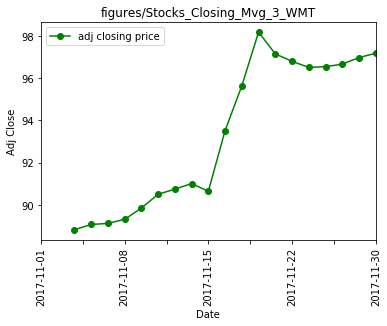

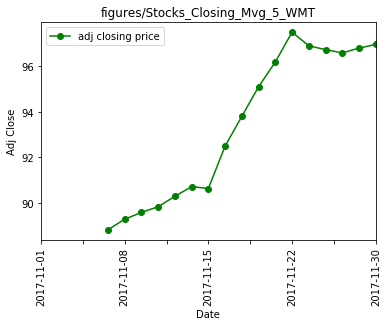

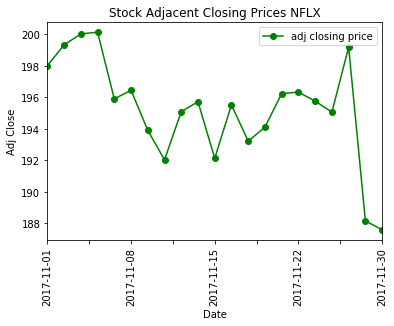

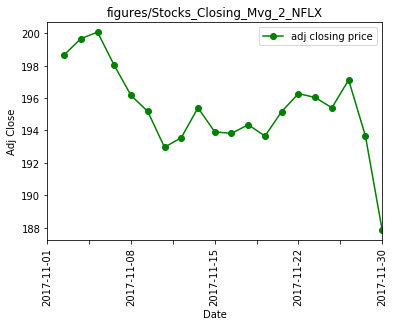

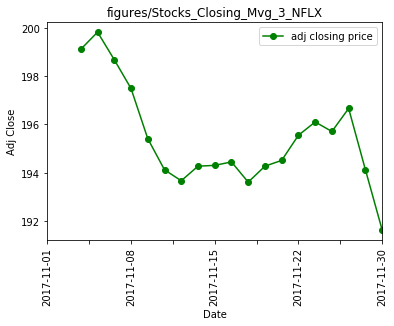

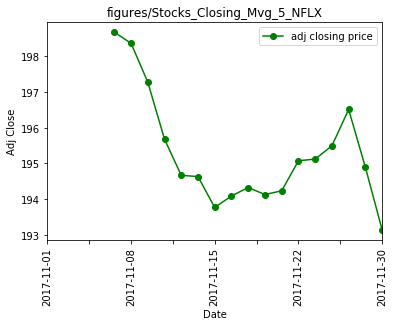

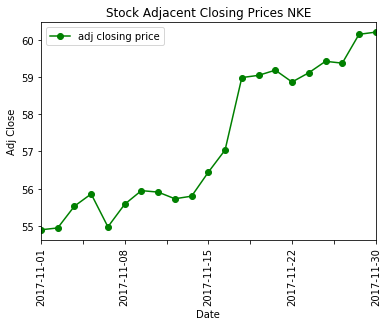

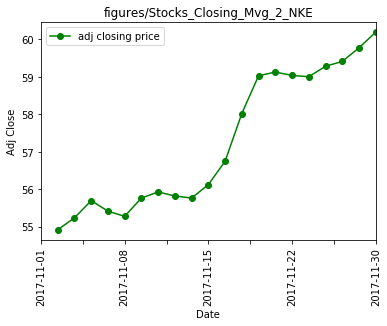

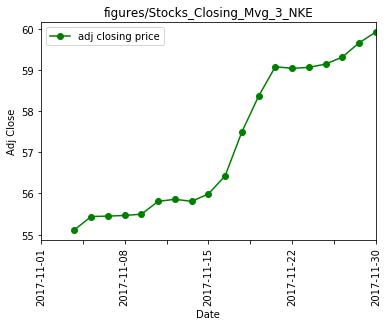

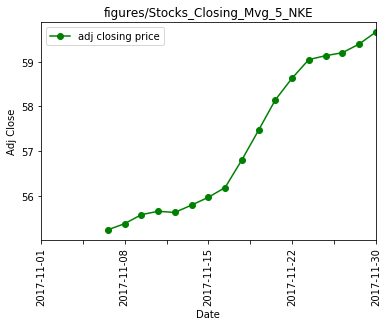

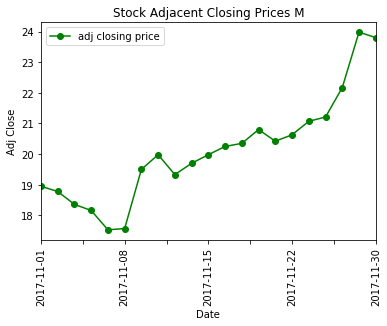

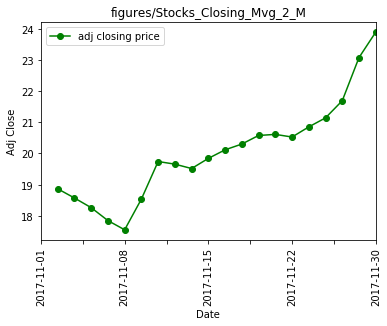

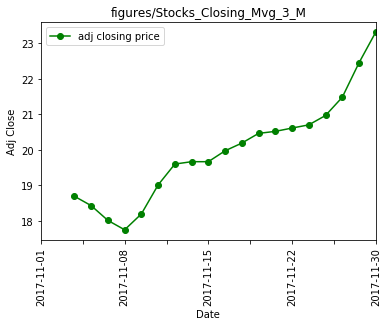

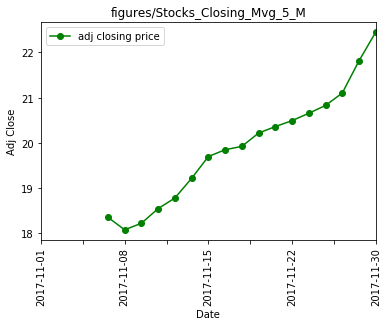

In [5]:
def plot_mvg_stocks(base,df,window_size):
    df.plot(kind="line",x="Date",y="Adj Close",color="green",label="adj closing price",marker="o")
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.title(f"{base}_{window_size}_{ticker}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f"{base}_{window_size}_{ticker}.png")

tickers = ['AAPL', 'V', 'AMZN', 'WMT', 'NFLX', 'NKE', 'M']

for ticker in tickers:
    df = pd.read_csv(f"data\{ticker}.csv")
    df = df[["Date","Adj Close"]]
    df.plot(kind="line",x="Date",y="Adj Close",color="green",label="adj closing price",marker="o")
    plt.xlabel("Date")
    plt.ylabel("Adj Close")
    plt.title(f"Stock Adjacent Closing Prices {ticker}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f"figures/Stocks_Closing_{ticker}.png")
    
    base_file = "figures/Stocks_Closing_Mvg"
    plot_mvg_stocks(base_file,df.rolling(2).mean(),2)
    plot_mvg_stocks(base_file,df.rolling(3).mean(),3)
    plot_mvg_stocks(base_file,df.rolling(5).mean(),5)  
    plt.show()


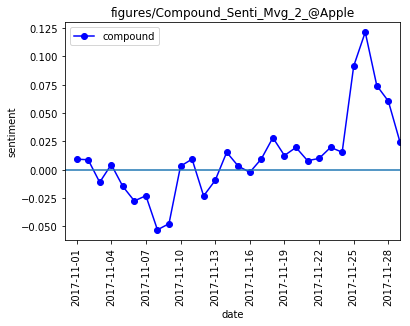

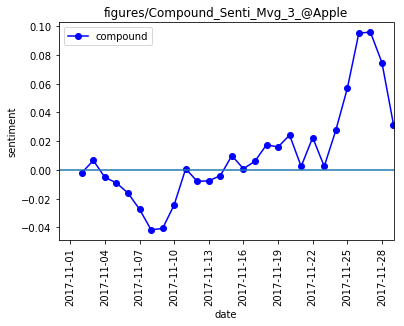

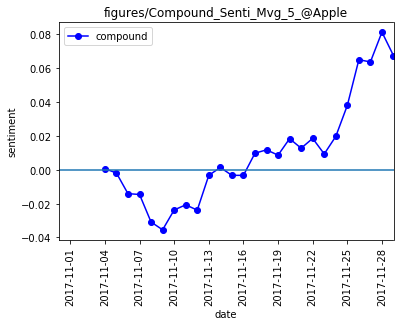

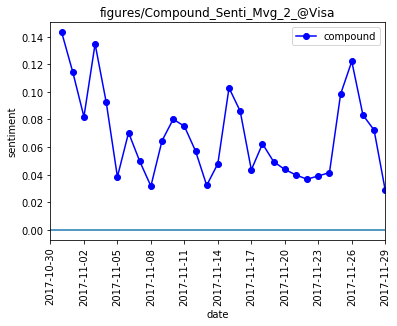

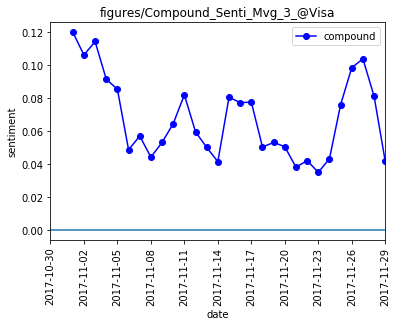

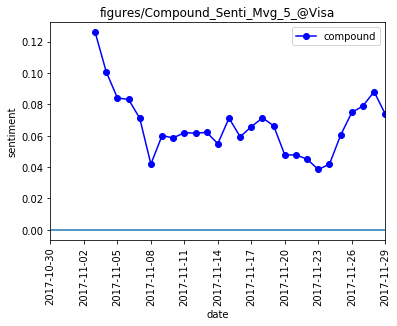

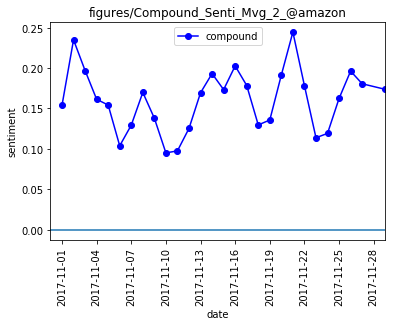

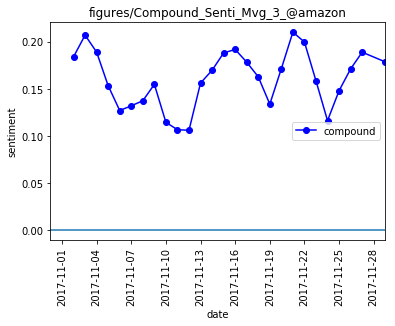

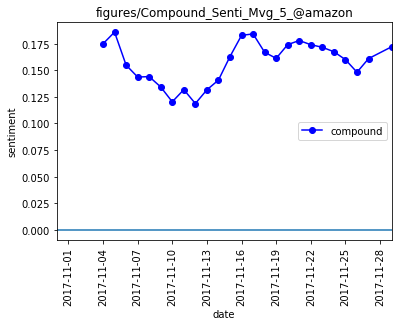

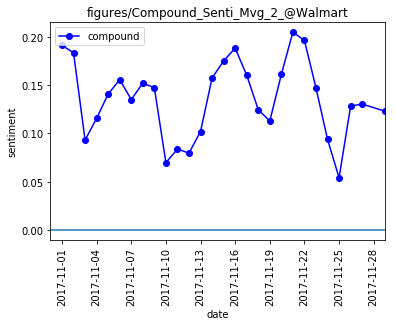

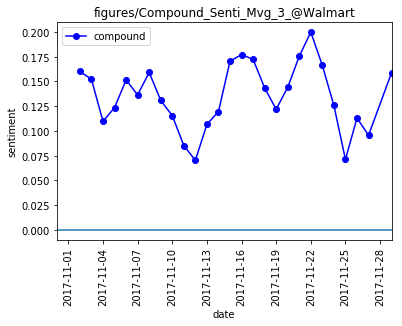

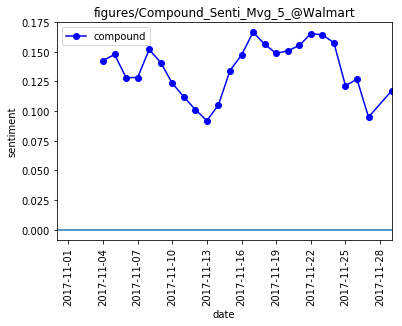

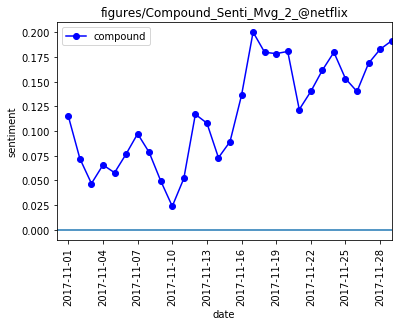

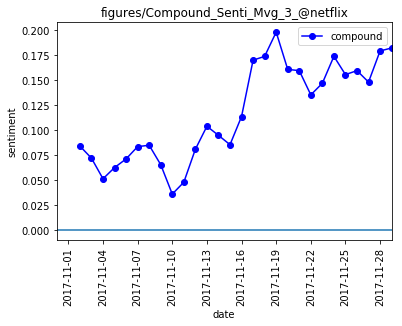

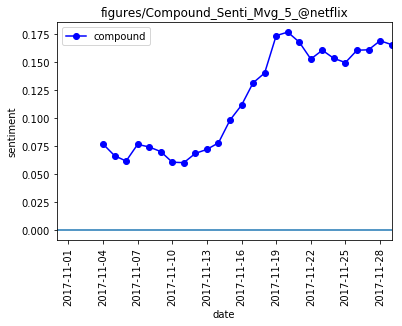

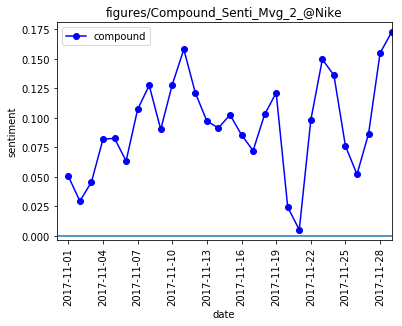

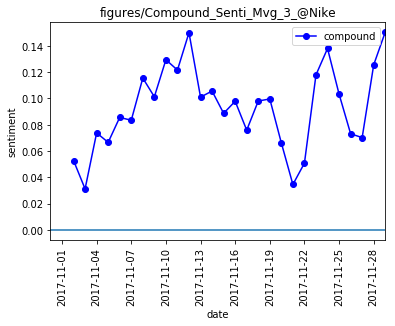

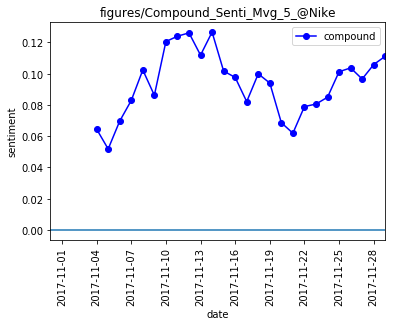

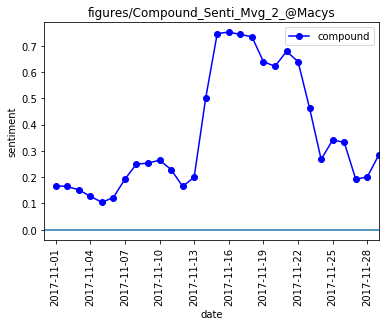

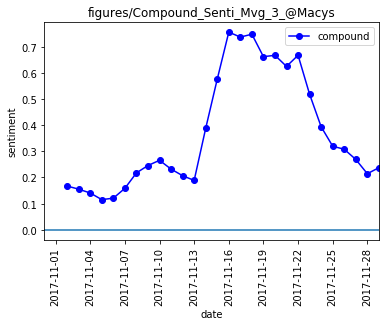

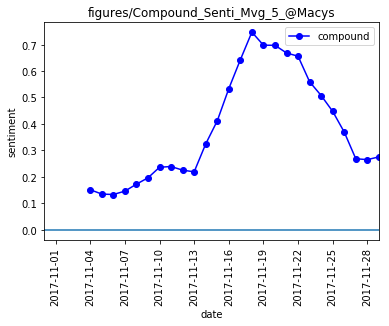

In [6]:
def plot_mvg_sentiments(base,df,window_size):
    df.plot(kind="line",x="date",y="compound",color="blue",label="compound",marker="o")
    plt.axhline(0.00)
    plt.xlabel("date")
    plt.ylabel("sentiment")
    plt.title(f"{base}_{window_size}_{key}")
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f"{base}_{window_size}_{key}.png")

for key, df in dataframes.items():
    base_file = "figures/Compound_Senti_Mvg"
    plot_mvg_sentiments(base_file,df.rolling(2).mean(),2)
    plot_mvg_sentiments(base_file,df.rolling(3).mean(),3)
    plot_mvg_sentiments(base_file,df.rolling(5).mean(),5)  
    plt.show()

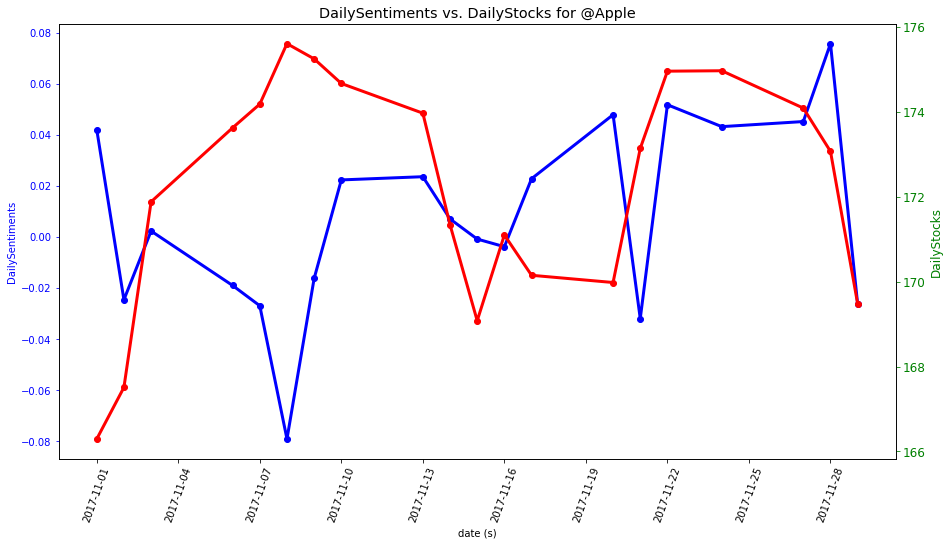

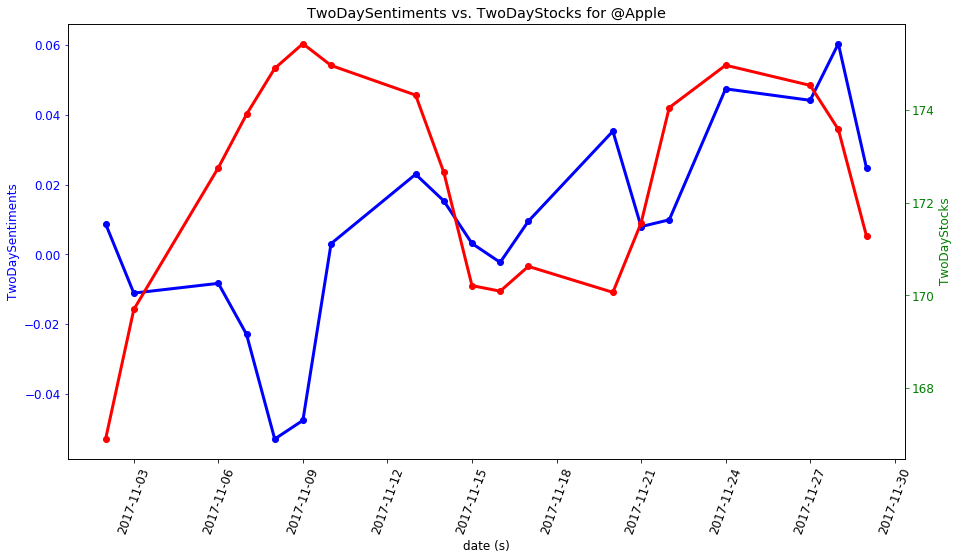

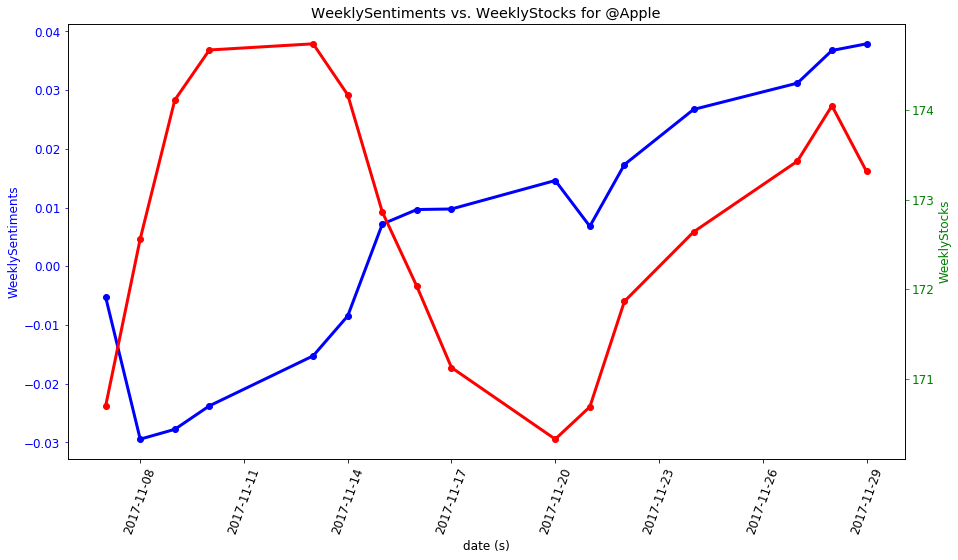

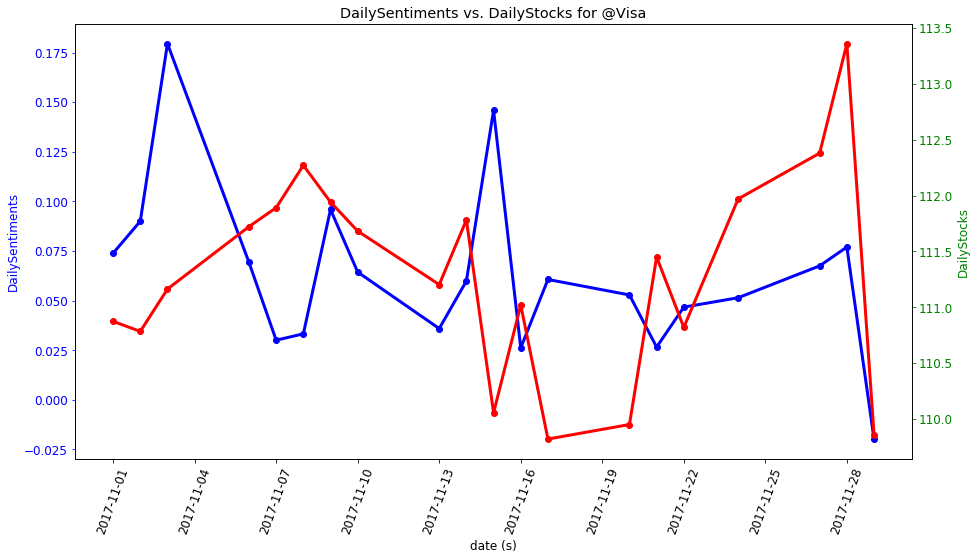

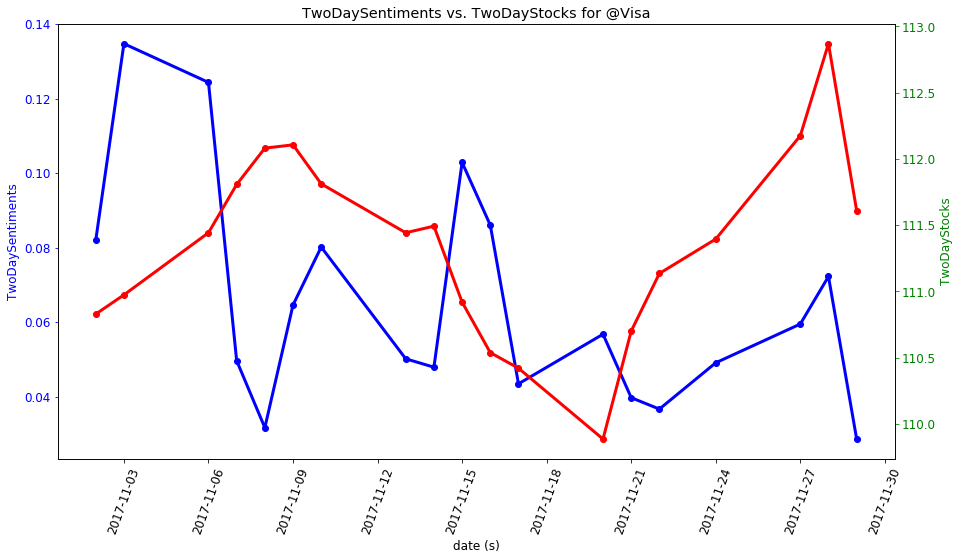

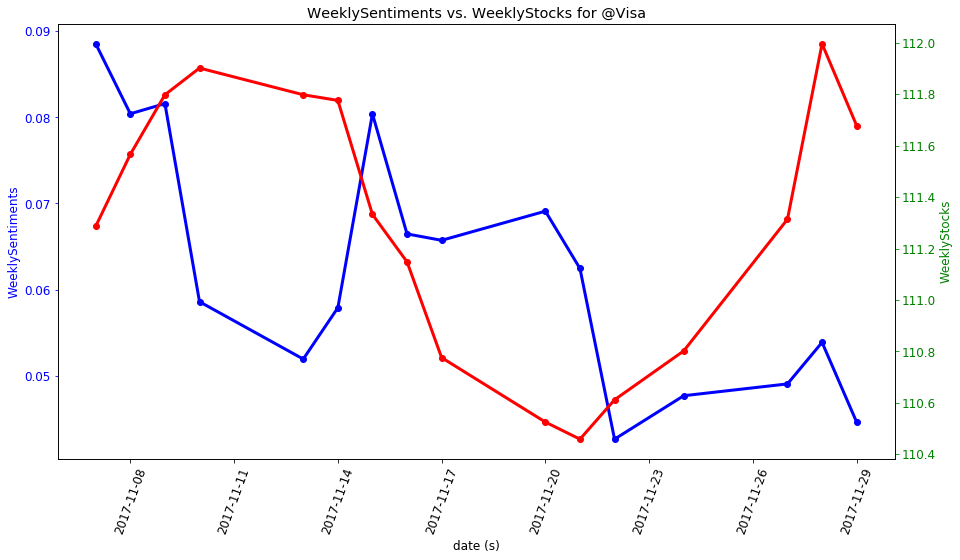

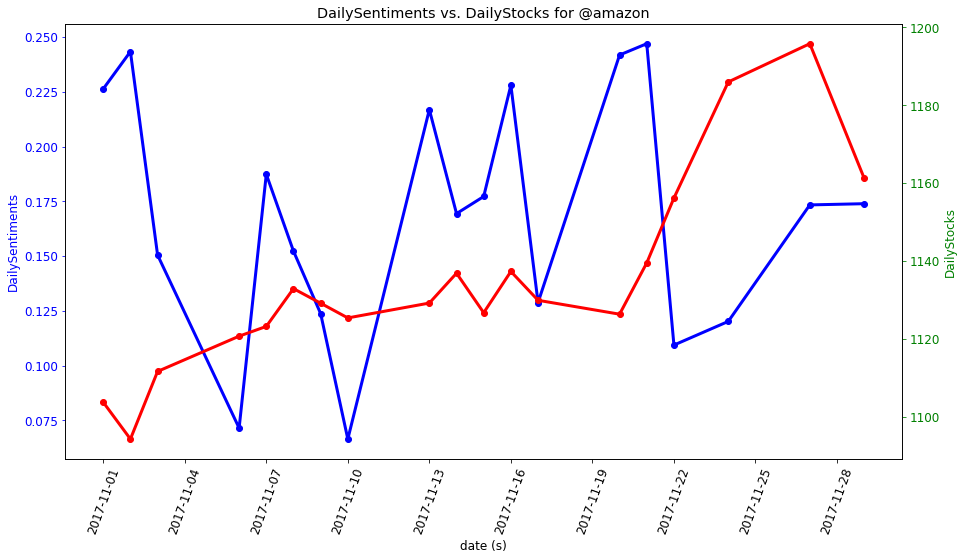

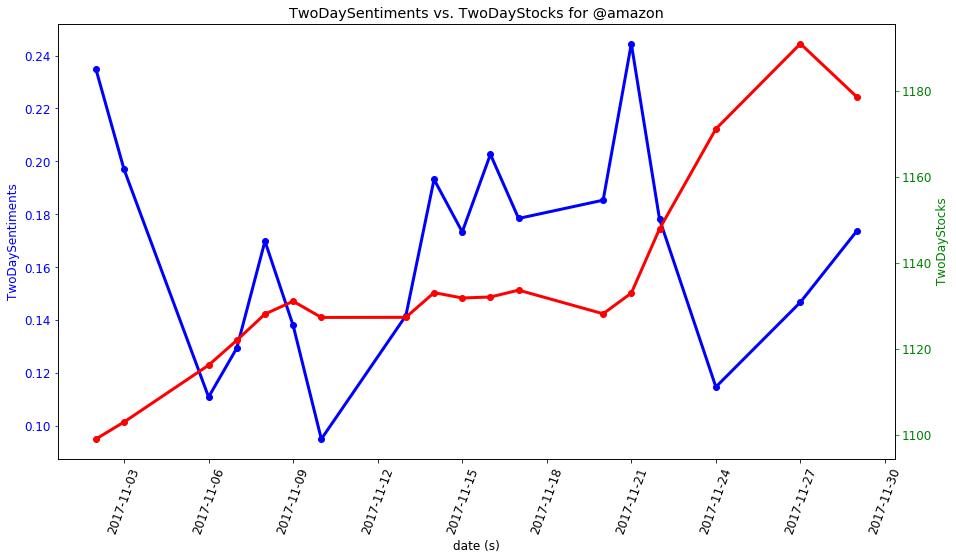

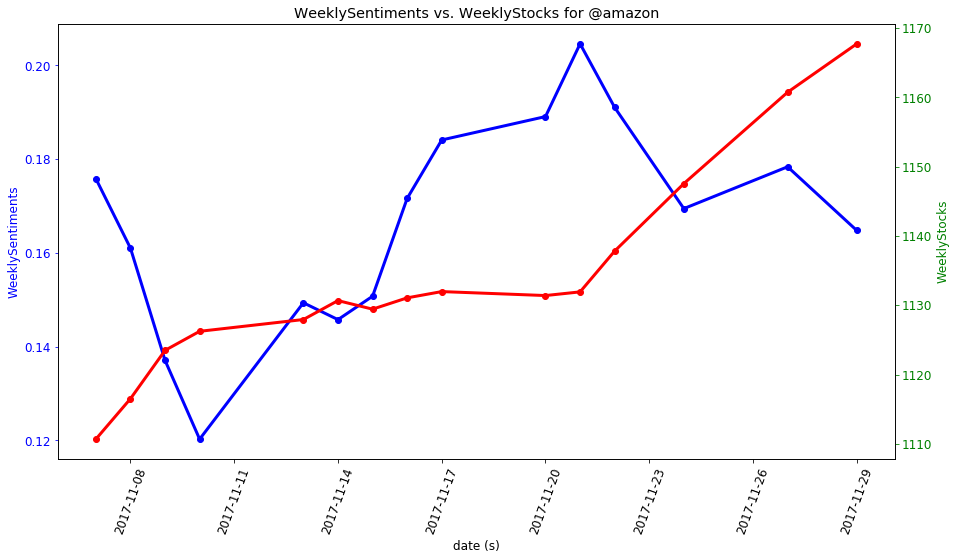

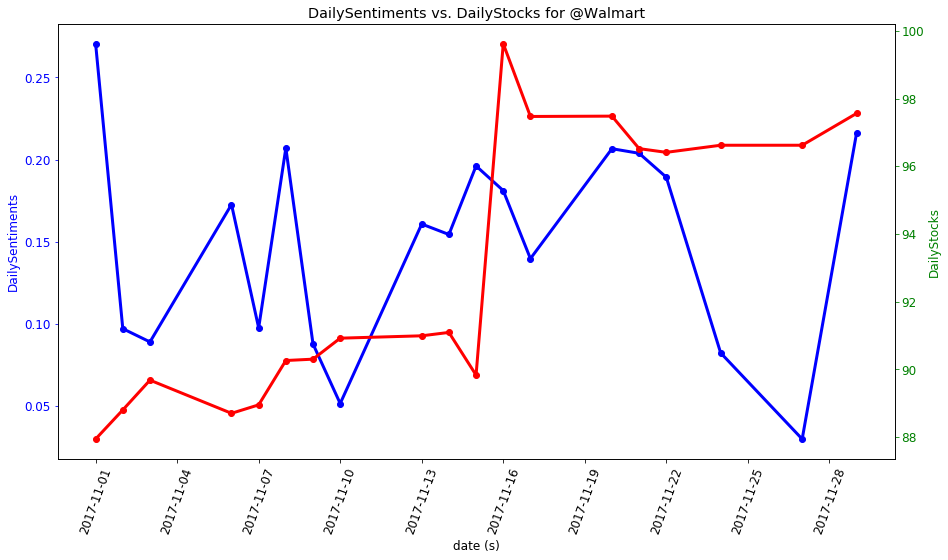

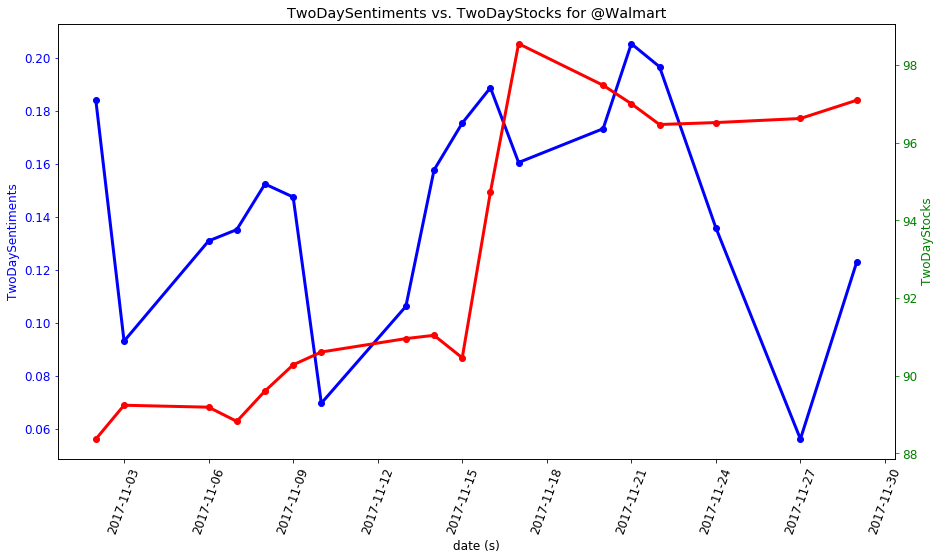

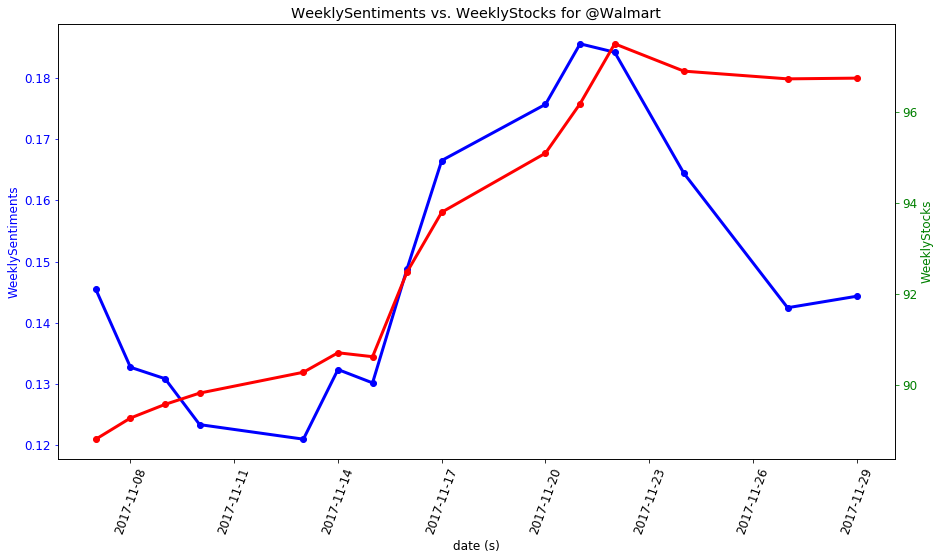

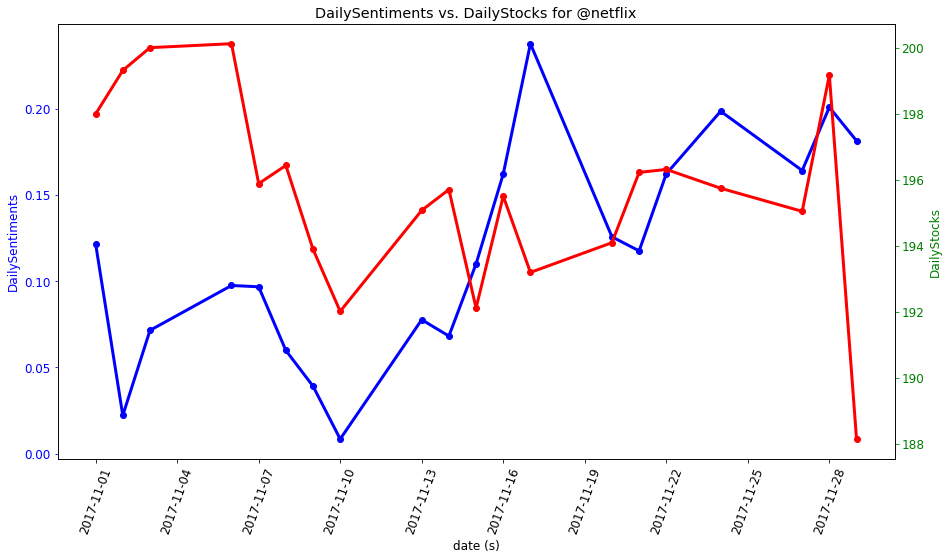

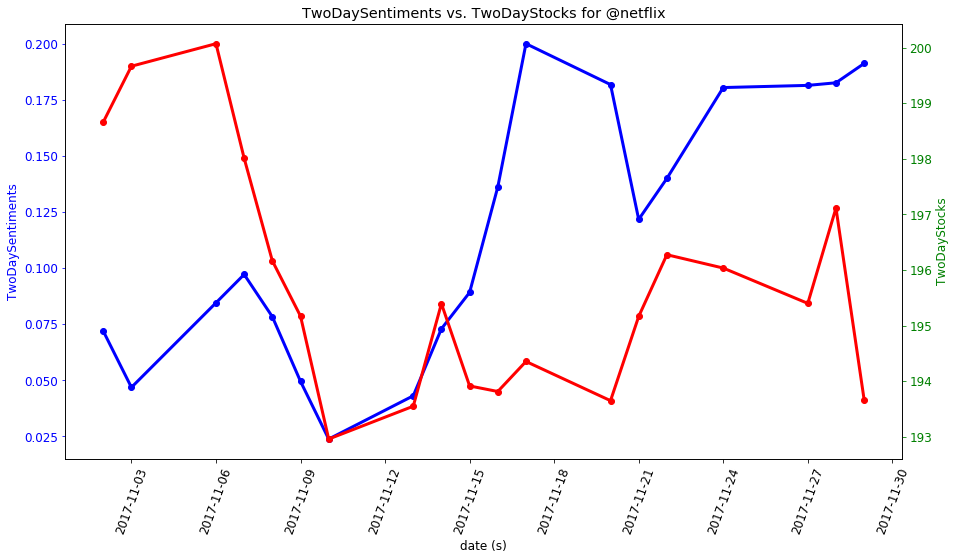

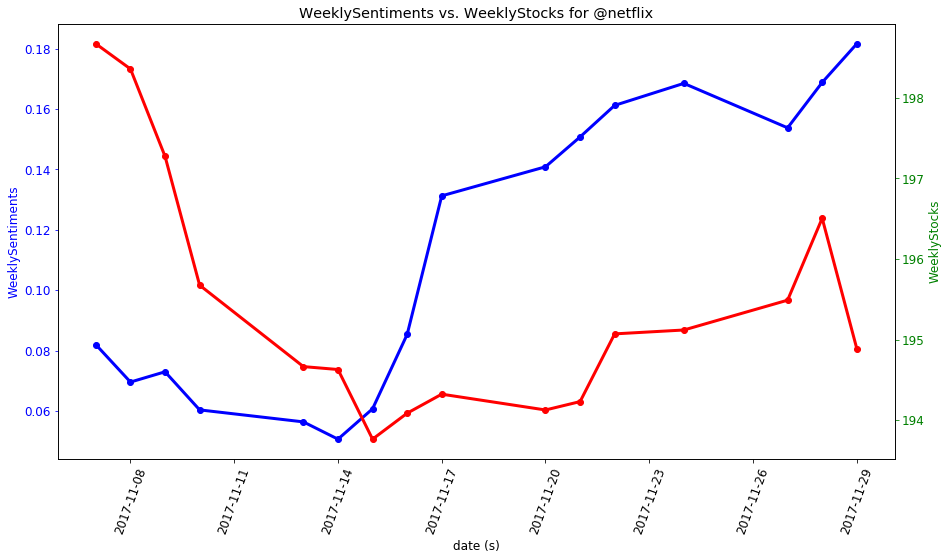

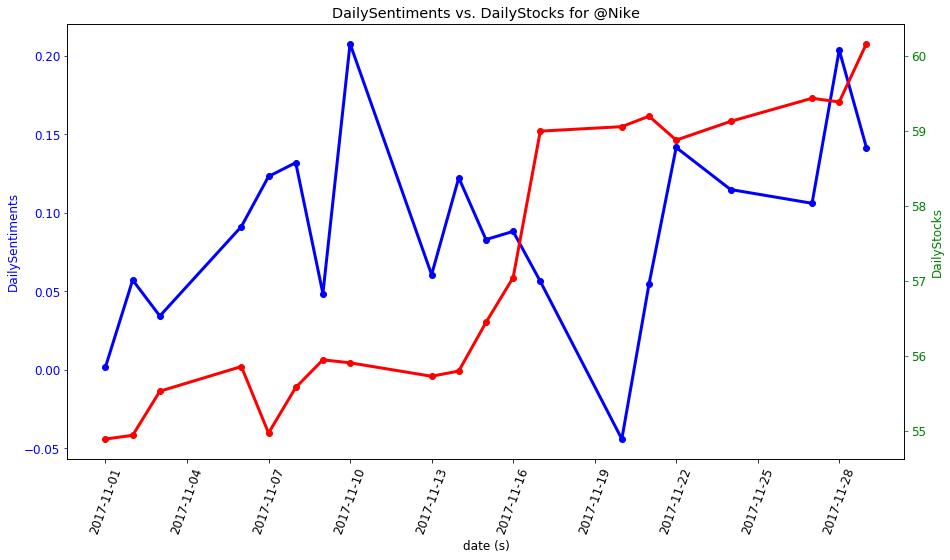

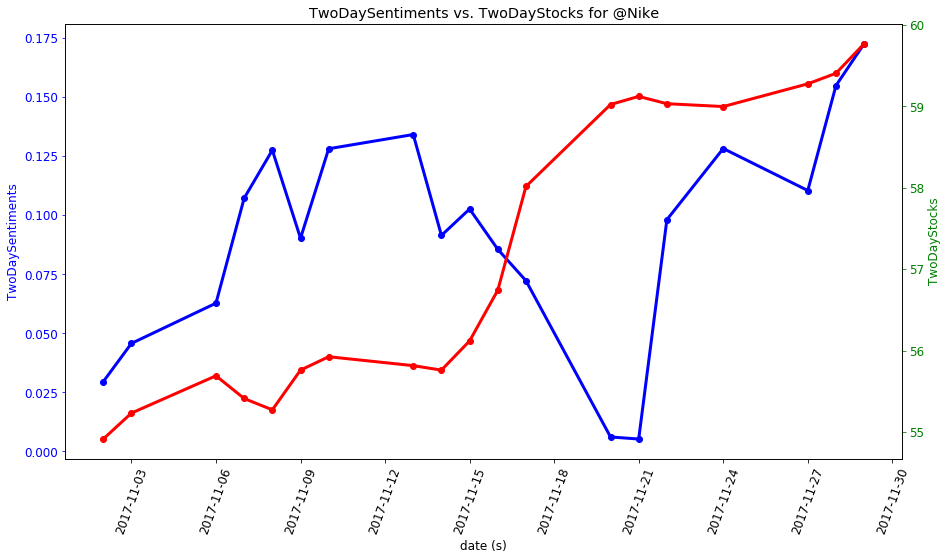

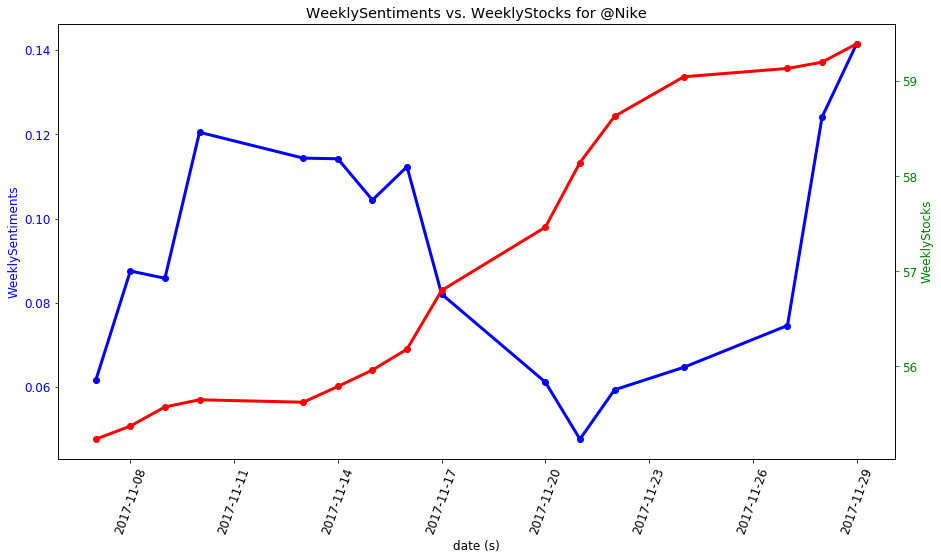

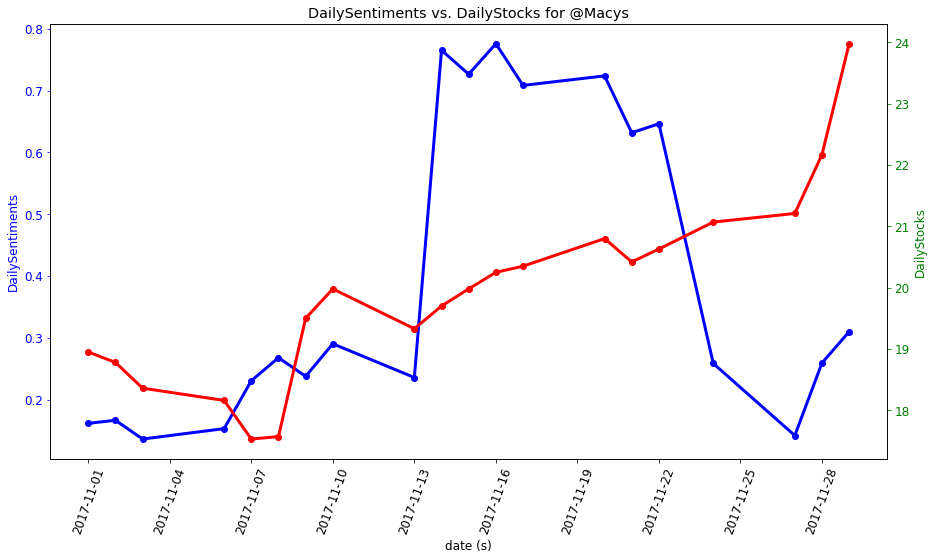

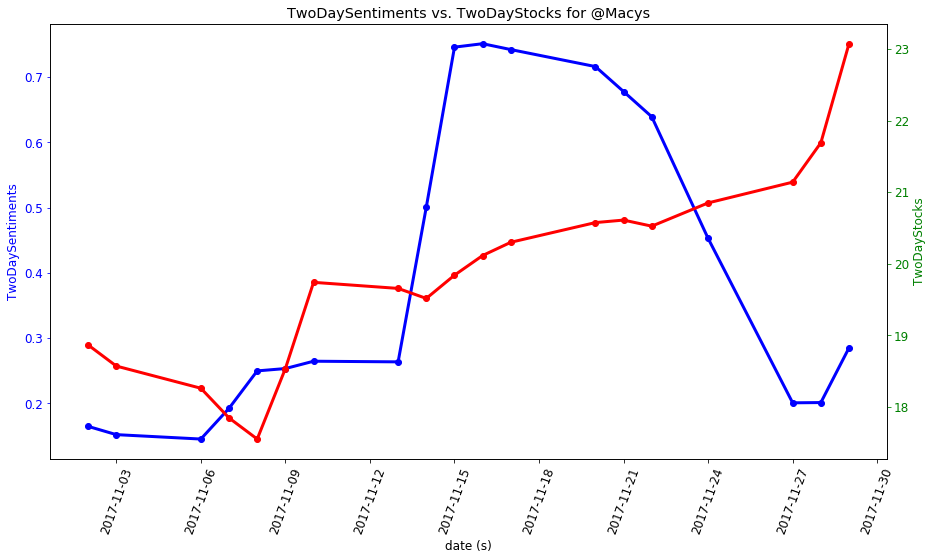

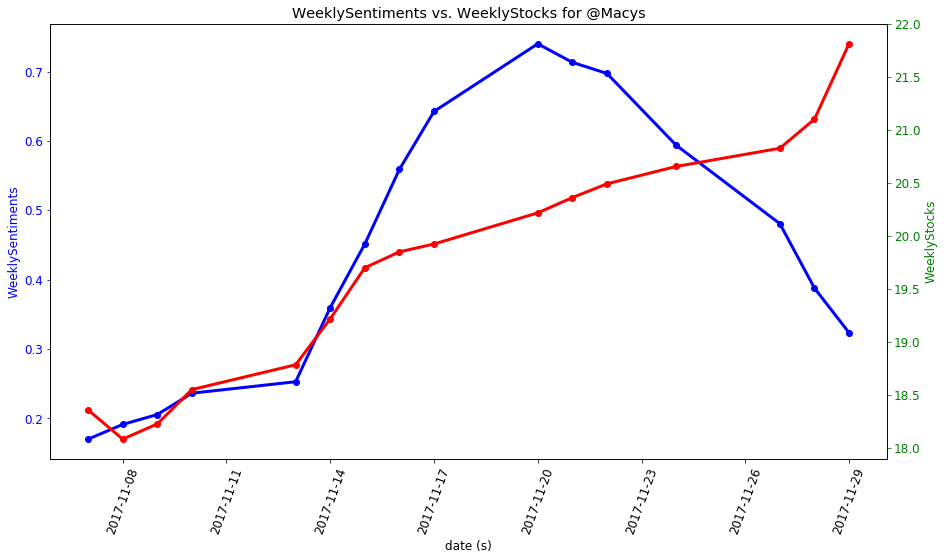

PermissionError: [Errno 13] Permission denied: 'Summary_Historic_moving_Averages.csv'

In [7]:
tweet_Stock_map = {"@Apple":"AAPL","@Visa":"V","@amazon":"AMZN","@Walmart":"WMT",'@netflix':"NFLX","@Nike":"NKE",'@Macys':"M"}

stock_tweets_final = pd.DataFrame()

stock_tweets_m_avg = pd.DataFrame()

def plot_stock_tweets(handle,df,y1,y2,y1_label,y2_label):
    fig, ax1 = plt.subplots(figsize=(15,8))

    plt.xticks(rotation=70)
    
    matplotlib.rcParams.update({'font.size': 12})

    t = df["Date"]
    s1 = df[y1]
    ax1.plot(t, s1, 'bo-',linewidth=3.0)
    ax1.set_xlabel('date (s)')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel(y1_label, color='b')
    ax1.tick_params('y', colors='b')

    ax2 = ax1.twinx()
    s2 = df[y2]
    ax2.plot(t, s2, 'ro-',linewidth=3.0)
    ax2.set_ylabel(y2_label, color='g')
    ax2.tick_params('y', colors='g')
    
    plt.title(f"{y1_label} vs. {y2_label} for {handle}")
    
    plt.savefig(f"figures/{y1_label}_vs_{y2_label}_{handle}.png")
    
    plt.show()

for handle,sentiment_df in dataframes.items():
    sentiment_df = sentiment_df.rename(columns={"date":"Date"})
    stock_df = pd.read_csv(f"data/{tweet_Stock_map[handle]}.csv")
    stock_df = stock_df[["Date","Adj Close"]]

    stock_df["Date"] = [datetime.strptime(x,"%Y-%m-%d").date() for x in stock_df["Date"]]
    
    stock_df["Company"] = [handle for x in stock_df["Date"]]
    stock_tweets_df = sentiment_df.merge(stock_df, on="Date")
    stock_tweets_final = stock_tweets_final.append(stock_tweets_df)
    
    
    stock_tweets_df = stock_tweets_df.sort_values(['Date'], ascending=True)
    
    stock_tweets_df_rolling_2 =  stock_tweets_df.rolling(2).mean()
    
    stock_tweets_df_rolling_2 = stock_tweets_df_rolling_2.rename(columns = {"compound": "compound_m_avg 2",
                                                                            "Adj Close":"stock_closing_m_avg 2"})
    
    stock_tweets_df_rolling_5 =  stock_tweets_df.rolling(5).mean()
    
    stock_tweets_df_rolling_5 = stock_tweets_df_rolling_5.rename(columns = {"compound": "compound_m_avg 5",
                                                                            "Adj Close":"stock_closing_m_avg 5"})
    
    stock_tweets_df_w_2 = stock_tweets_df.merge(stock_tweets_df_rolling_2,on=["Date","Company"])
    stock_tweets_df_w_5 = stock_tweets_df_w_2.merge(stock_tweets_df_rolling_5,on=["Date","Company"])
    
    stock_tweets_m_avg = stock_tweets_m_avg.append(stock_tweets_df_w_5)
    
    plot_stock_tweets(handle,stock_tweets_df_w_5,"compound","Adj Close","DailySentiments","DailyStocks")
    plot_stock_tweets(handle,stock_tweets_df_w_5,"compound_m_avg 2","stock_closing_m_avg 2","TwoDaySentiments","TwoDayStocks")
    plot_stock_tweets(handle,stock_tweets_df_w_5,"compound_m_avg 5","stock_closing_m_avg 5","WeeklySentiments","WeeklyStocks")

stock_tweets_final.to_csv("Summary_Historic_data.csv")
stock_tweets_m_avg.to_csv("Summary_Historic_moving_Averages.csv")